# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score, silhouette_samples

In [171]:
data = pd.read_csv("./csv/Mall_Customers.csv", sep=",")

In [172]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [173]:
data.shape

(200, 5)

Imprime true si hay columnas con valores vacios o false si estan todos llenos

In [174]:
print(data.isnull().any())

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool


In [175]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

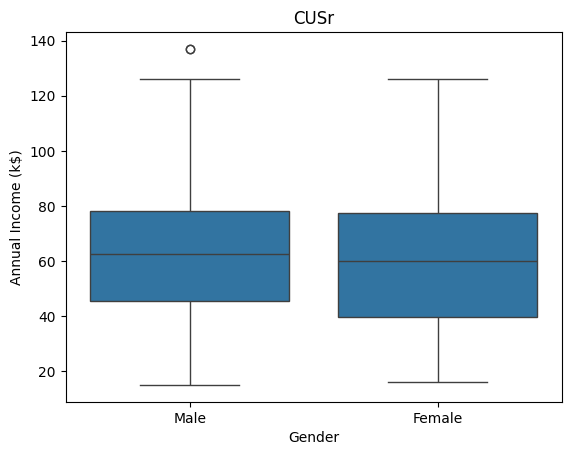

In [176]:
sns.boxplot(x=data["Gender"], y=data["Annual Income (k$)"])
plt.title("CUSr")
plt.show()

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

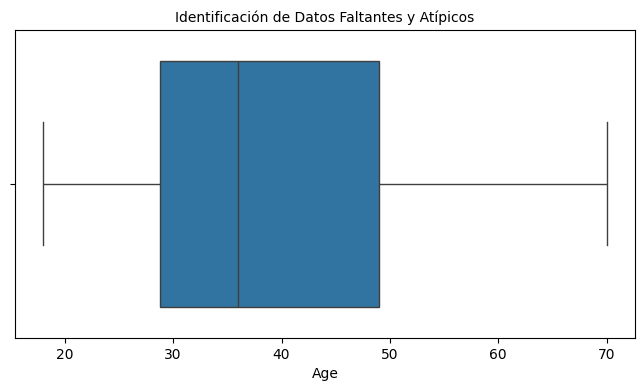

In [177]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

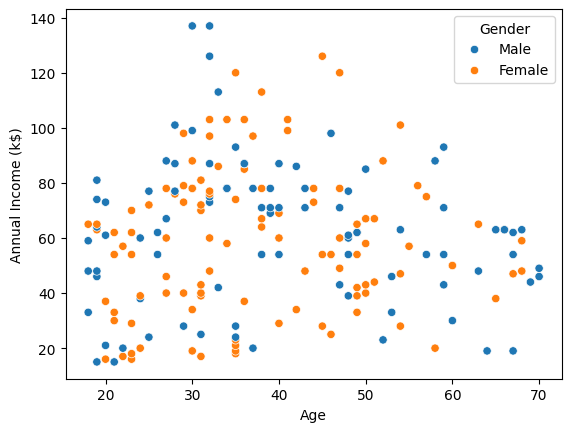

In [178]:
sns.scatterplot(x=data["Age"], y=data["Annual Income (k$)"], hue=data["Gender"])
plt.show()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

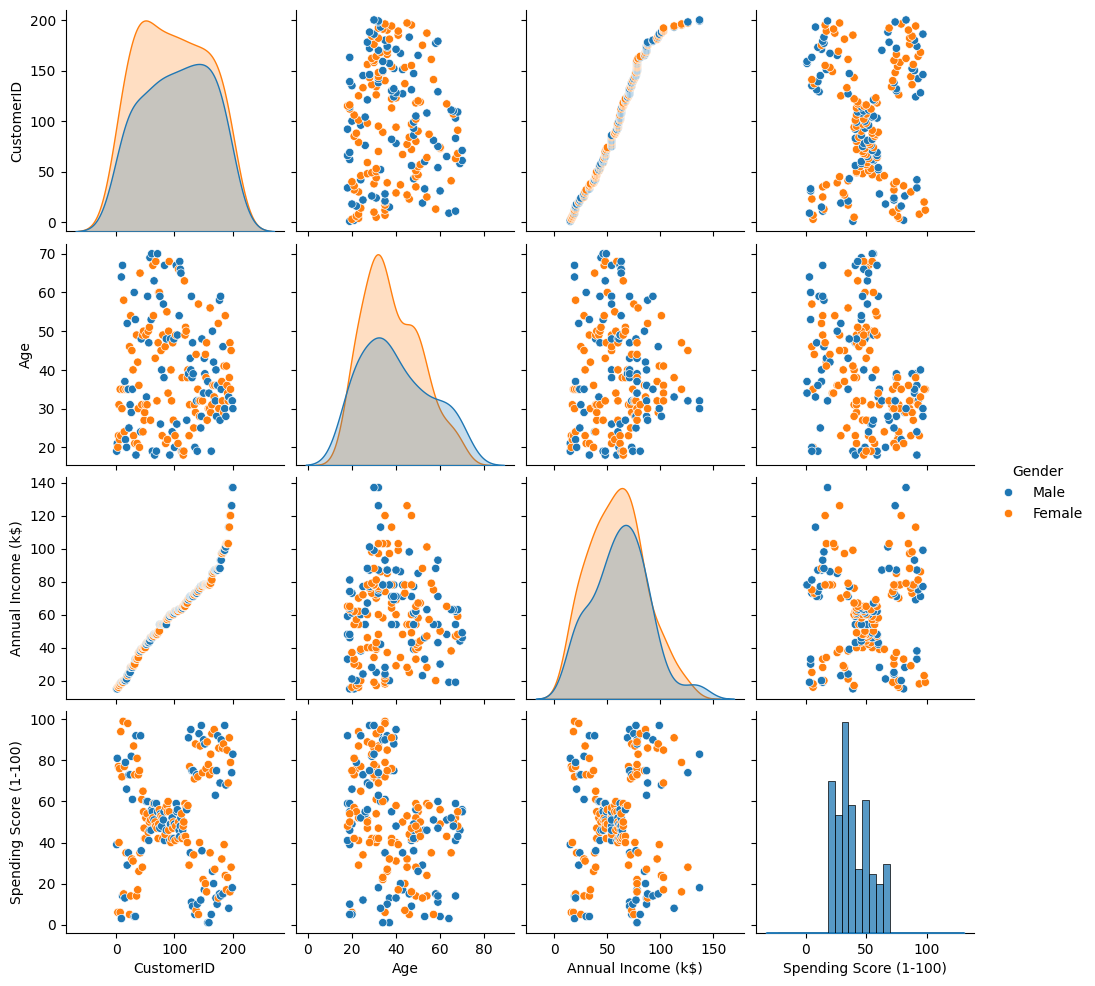

In [179]:
print(data.isnull().sum()) # Para ver si llegan campos vacios
print(data.describe())

sns.pairplot(data, hue="Gender")
sns.histplot(data["Age"])

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Normalizar la puntuación anual de ingresos y gastos en [Annual Income (K$)]

In [180]:
data = data.dropna(subset=["Annual Income (k$)"])

Convertir variables categóricas en numéricas

In [181]:
data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1})

Normalizar la puntuación anual de ingresos y gastos

In [182]:
data["Annual Income (k$)"] = (data["Annual Income (k$)"] - data["Annual Income (k$)"].min()) / (data["Annual Income (k$)"].max() - data["Annual Income (k$)"].min())
data["Spending Score (1-100)"] = (data["Spending Score (1-100)"] - data["Spending Score (1-100)"].min()) / (data["Spending Score (1-100)"].max() - data["Spending Score (1-100)"].min())

Calcular la media y la desviación típica de la edad y los ingresos anuales (k$)

In [183]:
mean_age = data["Age"].mean()
std_age = data["Age"].std()
mean_income = data["Annual Income (k$)"].mean()
std_income = data["Annual Income (k$)"].std()

In [184]:
print(f"Edad media: {mean_age:.0f}, Desviación estándar Edad: {std_age:.2f}")
print(f"Ingresos medios anuales (k$): {mean_income:.2f}, Desviación estándar Renta anual (k$): {std_income:.2f}")

Edad media: 39, Desviación estándar Edad: 13.97
Ingresos medios anuales (k$): 0.37, Desviación estándar Renta anual (k$): 0.22


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [185]:
X = data.drop("Spending Score (1-100)", axis=1)
y = data["Spending Score (1-100)"]

selector = SelectKBest(score_func=f_regression, k=2)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

# 4. Entrenar el modelo configurando los diferentes hiperparámetros.

In [186]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_new)

KMeans(n_clusters=3, random_state=42)

# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

Calcular el Coeficiente de Silueta

In [187]:
sil_score = silhouette_score(X_new, kmeans.labels_)
ch_score = calinski_harabasz_score(X_new, kmeans.labels_)

print("Índice de Silhouette:", sil_score)
print("Índice de Calinski-Harabasz:", ch_score)

Índice de Silhouette: 0.550322659387734
Índice de Calinski-Harabasz: 531.2841305863675


Calcular el Índice de Calinski-Harabasz X

In [188]:
calinski_harabasz_index = calinski_harabasz_score(X, kmeans.labels_)
print("Índice de Calinski-Harabasz:", calinski_harabasz_index)

Índice de Calinski-Harabasz: 15.038954882134291


Calcular el Índice de Davies-Bouldin

In [189]:
davies_bouldin_index = davies_bouldin_score(X, kmeans.labels_)
print("Índice de Davies-Bouldin:", davies_bouldin_index)

Índice de Davies-Bouldin: 2.514874851811717


Calcular el Coeficiente de Silueta para cada muestra

In [190]:
silhouette_values = silhouette_samples(X, kmeans.labels_)
print("Valores de Silhouette para cada muestra:\n", silhouette_values)

Valores de Silhouette para cada muestra:
 [ 1.57062099e-01  1.53240236e-01  1.58842344e-01  1.49243784e-01
 -3.29763162e-01  1.56911062e-01 -3.21949856e-01  1.54987298e-01
  8.51178575e-02 -3.40132019e-01  1.04300000e-01 -3.27909023e-01
  7.02818919e-02  1.55337772e-01 -3.24979062e-01  1.67254911e-01
 -3.33036961e-01  1.77479461e-01  5.41438927e-02 -3.35828641e-01
 -3.36769001e-01  1.51239832e-01  1.71420551e-02 -3.53184012e-01
  9.45701158e-02 -3.61812254e-01 -3.32591251e-01 -3.42732311e-01
 -3.25459416e-01  1.65153860e-01  1.60446427e-01  1.78516763e-01
  1.24779154e-01  1.94550881e-01  9.87526526e-02  1.77907841e-01
 -3.48392142e-01 -3.66943752e-01 -3.44059240e-01  1.81853755e-01
  2.32614186e-01  1.49751224e-01  1.28722554e-01 -3.63708267e-01
  1.50044554e-01  1.44327260e-01  1.70534059e-01  1.09613871e-01
 -3.69352032e-01 -3.60991194e-01  1.79763716e-01 -3.51800638e-01
 -3.58952917e-01  2.73959121e-01  2.09222261e-01  1.78031646e-01
  2.27957236e-01  3.25701348e-01  8.91437145e-02

Calcular la inercia del modelo (suma de las distancias al cuadrado de las muestras al centroide más cercano)

In [191]:
inertia = kmeans.inertia_
print("Inercia del modelo:", inertia)

Inercia del modelo: 6081.06277056277


# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

<function matplotlib.pyplot.show(close=None, block=None)>

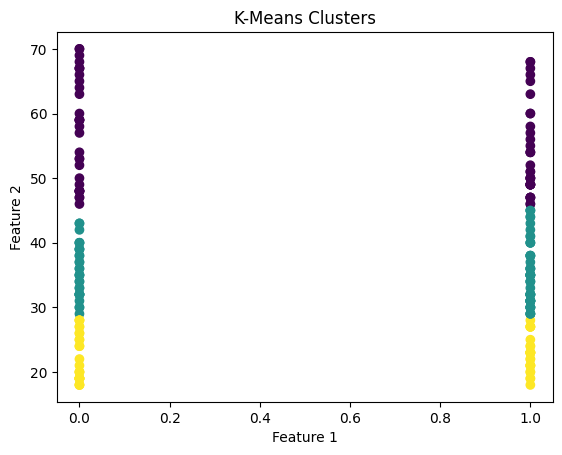

In [192]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=kmeans.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clusters")
plt.show

Visualizar los centroides de los clusters

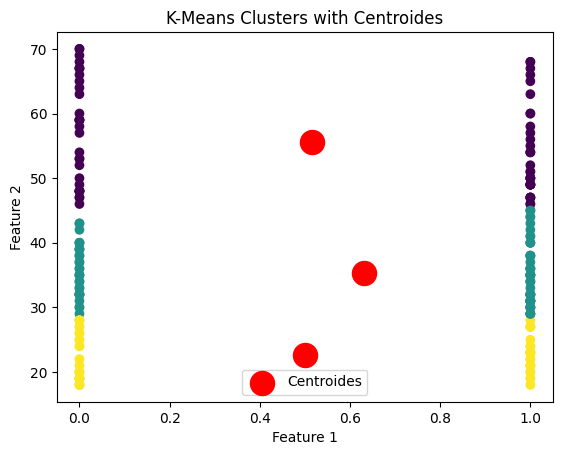

In [193]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clusters with Centroides")
plt.legend()
plt.show()

Visualizar la inercia del modelo para diferentes números de clusters

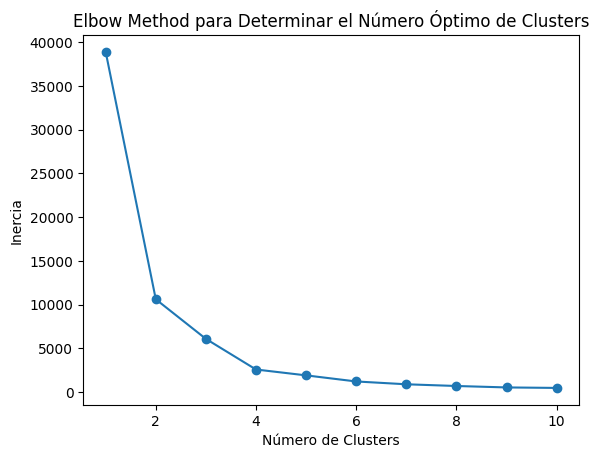

In [194]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_new)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Elbow Method para Determinar el Número Óptimo de Clusters')
plt.show()